Сборный проект №2

**Описание проекта:** Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 

**Цель работы:** Изучить воронку продаж. Узнайть, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

**Описание данных:**

Каждая запись в логе — это действие пользователя, или событие. 

- **EventName** — название события;

- **DeviceIDHash** — уникальный идентификатор пользователя;

- **EventTimestamp** — время события;

- **ExpId** — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

**План работы:**
1. **[Открыть файл с данными и изучить общую информацию](#section1)**
2. **[Подготовить данные:](#section2)**
    - Заменить названия столбцов на удобные;
    - Проверить пропуски и типы данных. Откорректировать если нужно;
    - Добавить столбец даты и времени, а также отдельный столбец дат;
3. **[Изучить и проверить данные:](#section3)**
    - Сколько всего событий в логе?
    - Сколько всего пользователей в логе?
    - Сколько в среднем событий приходится на пользователя?
    - Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Изучите, как меняется количество данных: постройте столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
    - Много ли событий и пользователей вы потеряли, отбросив старые данные?
    - Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.
4. **[Изучить воронку событий:](#section4)**
    - Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
    - Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей.     - Посчитайте долю пользователей, которые хоть раз совершали событие.
    - Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
    - По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
    - На каком шаге теряете больше всего пользователей?
    - Какая доля пользователей доходит от первого события до оплаты?
5. **[Изучить результаты эксперимента:](#section5)**
    - Сколько пользователей в каждой экспериментальной группе?
    - Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
    - Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
    - Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
    - Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.


**Для корректной работы, импоритруем необходимые библиотеки:**

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy import stats as st
import math as mth
import plotly.graph_objects as go

<a id='section1'></a>
## Открыть файл с данными и изучить общую информацию 

In [3]:
try:
    data = pd.read_csv('/datasets/logs_exp.csv', sep = '\t')
except:
    
    try:
        data = pd.read_csv('/Users/sergey/Downloads/logs_exp.csv', sep = '\t')
    except :
        data = None  

if data is None:
    print('Что-то не так')
else:
    print('Данные успешно загружены')
    print('*' * 40)
    print('Вывожу первые 10 сторк датафрейма:')
    display(data.head(10))
    print('*' * 40)
    print('Вывожу основную информацию о датафрейме:')
    data.info()

Данные успешно загружены
****************************************
Вывожу первые 10 сторк датафрейма:


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


****************************************
Вывожу основную информацию о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


<a id='section2'></a>
## Подготовим данные:

In [4]:
# универсальная функция для выполнения предобработки данных
def data_preprocessing(df):
   
    # Посмотрим основные данные о DataFrame
    print('Информация о данных (info()):')
    print(df.info())
    print()
    
    # Оценим статистические данные
    print('Статистическая информация о данных (describe()):')
    print(df.describe())
    print()
    
    # Посмотрим на типы данных в DataFrame
    print('Типы данных (dtypes):')
    print(df.dtypes)
    print()
    
    # Посчитаем количество явных дубликатов, удалим их при наличии
    print('Кол-во дубликатов = ', df.duplicated().sum())
    print()
    
    # Функция исправления названий строк
    df.columns = df.columns.str.lower().str.replace(' ', '_')     

In [5]:
data_preprocessing(data)

Информация о данных (info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

Статистическая информация о данных (describe()):
       DeviceIDHash  EventTimestamp          ExpId
count  2.441260e+05    2.441260e+05  244126.000000
mean   4.627568e+18    1.564914e+09     247.022296
std    2.642425e+18    1.771343e+05       0.824434
min    6.888747e+15    1.564030e+09     246.000000
25%    2.372212e+18    1.564757e+09     246.000000
50%    4.623192e+18    1.564919e+09     247.000000
75%    6.932517e+18    1.565075e+09     248.000000
max    9.222603e+18    1.565213e+09     248.000000

Типы данных (dtypes):
Eve

In [6]:
data.head()

,eventname,deviceidhash,eventtimestamp,expid
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


#### Вывод:
При помощи универсальной функции, рассмотрели основные данные по таблице. Таблица состоит из 244126 строк и 4 столбцов. Обнаруженны стилистические ошибки в названии столбцов, которые были исправленны внутри функции, но для более читаемого вида, необходимо добавить нижний регистр между словами в столбцах. Пропуски в данных отсутствуют. Обнаруженно 413 явных дубликатов. Так же необходимо привести столбцец EventTimestamp к корректному виду и правильному типу данных.

### Заменим названия столбцов на удобные:

In [7]:
data = data.rename(columns={
    'eventname' : 'event_name',
    'deviceidhash' : 'user_id',
    'eventtimestamp' : 'event_timestamp',
    'expid' : 'exp_id'
})

In [8]:
# посмотрим на таблицу после внесенных изменений
data.head()

,event_name,user_id,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


### Добавить столбец даты и времени, а также отдельный столбец даты и времени

In [9]:
data['event_date'] = pd.to_datetime(data['event_timestamp'], unit='s')
data['event_dt'] = pd.to_datetime(data['event_date'].dt.date)

In [10]:
# посмотрим на таблицу после внесенных изменений и добавления новых столбцов
data.head()

,event_name,user_id,event_timestamp,exp_id,event_date,event_dt
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


Избавимся от явных дубликатов в таблице

In [11]:
data = data.drop_duplicates()

In [12]:
# убедимся в отсутвии пропусков
print('Количество явных дубликатов равно:', data.duplicated().sum())

Количество явных дубликатов равно: 0


**Проверим на неявные дубликаты по столбцам с событием, id пользователя и группой:** 

In [13]:
duplicates_count = data[['event_name', 'user_id', 'event_timestamp','exp_id']].duplicated().sum()
print("Количество дубликатов по столбцах 'event_name', 'user_id', 'event_timestamp' и 'exp_id':", duplicates_count)

Количество дубликатов по столбцах 'event_name', 'user_id', 'event_timestamp' и 'exp_id': 0


**Посмотрим на общую информацию после выполнения обработки данных**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   user_id          243713 non-null  int64         
 2   event_timestamp  243713 non-null  int64         
 3   exp_id           243713 non-null  int64         
 4   event_date       243713 non-null  datetime64[ns]
 5   event_dt         243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 13.0+ MB


**Проверим, являются ли пользователи одной группы, пользователями другой группы**

In [15]:
# соберем пользователей каждой группы и номера имеющихся групп
users_group_246 = data[data['exp_id'] == 246]['user_id']
users_group_247 = data[data['exp_id'] == 247]['user_id']
users_group_248 = data[data['exp_id'] == 248]['user_id']
unique_exp_id = data['exp_id'].unique()

In [16]:
# функция для нахождения пересечений в пользователей в группе
def intersection(data_1, data_2):
    result = data_1.isin(data_2).sum()
    return result

In [17]:
# Проверим на пересечения пользователей группы 246 и 247
intersection(users_group_246, users_group_247)

0

In [18]:
# Проверим на пересечения пользователей группы 246 и 248
intersection(users_group_246, users_group_248)

0

In [19]:
# Проверим на пересечения пользователей группы 247 и 248
intersection(users_group_247, users_group_248)

0

Пересечения пользователей в группах не обнаружены.

#### Вывод:
В ходе проведения предобработки данных были выполнены следующие операции:

1. Исправлены названия столбцов: Названия столбцов были исправлены для улучшения читаемости и соответствия определенным стандартам.

2. Удалено 413 явных дубликатов: Были обнаружены строки данных, которые полностью повторяли друг друга, и эти дубликаты были удалены.

3. Добавлены два новых столбца с датами и временем:  один для хранения даты и другой для хранения времени.

4. Проверенно, что пользователи каждой группы являются уникальными и не повторяются в других группах.


<a id='section3'></a>
## Изучим и проверим данные

Для удобства выведем таблицу

In [20]:
data.tail()

,event_name,user_id,event_timestamp,exp_id,event_date,event_dt
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07
244125,OffersScreenAppear,5746969938801999050,1565212517,246,2019-08-07 21:15:17,2019-08-07


### Сколько всего событий в логе?

In [21]:
# посчитаем количество уникальных событий
print('Всего у нас:', data['event_name'].nunique(), 'уникальных событий.')
print('Общее количество событий равно', data['event_name'].count(), 'события')

Всего у нас: 5 уникальных событий.
Общее количество событий равно 243713 события


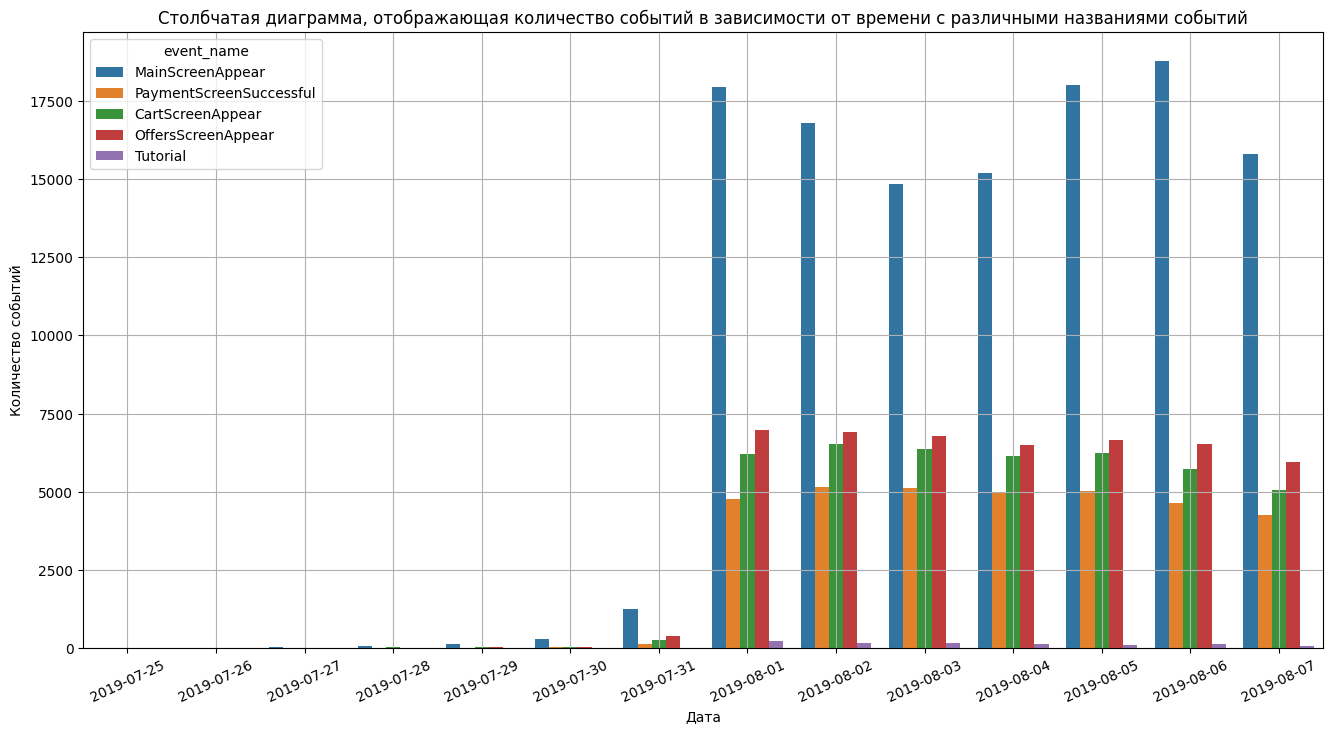

In [22]:
# построим количество событий в зависимости от времени
plt.figure(figsize=(16, 8))

sns.countplot(
    x=data['event_dt'].dt.date, 
    hue=data['event_name']
)

plt.title('Столбчатая диаграмма, отображающая количество событий в зависимости от времени с различными названиями событий')
plt.ylabel('Количество событий')
plt.xlabel('Дата')
plt.grid(True)
plt.xticks(rotation=25)

plt.show()

#### Вывод:

Общее количество событий равняется  243713 

Всего имеется 5 событий в логе:
1. MainScreenAppear - Появление главного экрана
2. PaymentScreenSuccessful - Успешное выполнение платежа
3. CartScreenAppear - Появление экрана с  корзины
4. OffersScreenAppear - Появление экрана с предложениями
5. Tutorial - Учебное пособоие

### Сколько всего пользователей в логе?

In [23]:
data['user_id'].nunique()

7551

#### Вывод:
Всего 7551 уникальный пользователь

### Сколько в среднем событий приходится на пользователя?

In [24]:
# сгрупируем количество событий для каждого уникального пользователя
events = (
    data.groupby('user_id')
    .agg({'event_name' : 'count'})
    .reset_index()
    .sort_values(by='event_name', ascending=False)
)
events.columns = ['id', 'count_event']

In [25]:
# посмотрим топ 10 пользователей по событиям
events.head(10)

,id,count_event
5116,6304868067479728361,2307
147,197027893265565660,1998
3714,4623191541214045580,1768
5590,6932517045703054087,1439
1391,1754140665440434215,1221
2641,3337471580007169353,1186
6294,7738058666231999878,888
822,1055544042902443290,854
3801,4713748699910253089,824
6617,8118046800480174342,755


In [26]:
print('Среднее колличество событий на каждого пользователя:', round(events['count_event'].mean(), 1))
# рассчитаем 
print('Медианное количество событий на каждого пользователя:', events['count_event'].median())


Среднее колличество событий на каждого пользователя: 32.3
Медианное количество событий на каждого пользователя: 20.0


#### Вывод:
В среднем на пользователя приходится 32.3 события. Если брать медианное значение, то получаетсся 20 запросов на пользователя. В топ-10 пользователй по запросам входят пользователи с количеством запросов от 2307 до 755. Эти результаты позволяют лучше понять активность пользователей.

### Данными за какой период вы располагаете?

In [27]:
# найдем минимальную дату в данных
data['event_dt'].min()

Timestamp('2019-07-25 00:00:00')

In [28]:
# найдем максимальную дату в данных
data['event_dt'].max()

Timestamp('2019-08-07 00:00:00')

In [29]:
# найдем rjkичество дней в исследуемых данных
data['event_dt'].max() - data['event_dt'].min()

Timedelta('13 days 00:00:00')

#### Вывод: 
Первая запись лога была 25 июля 2019 года, последняя запись 7 августа того же года. Всего у нас есть данные за 13 дней.

### Построим столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп.

In [30]:
# соберем таблицу с датой, номером и количеством события
event_count = (
    data.pivot_table(index=['event_dt', 'exp_id'],
                     values='event_name', 
                     aggfunc='count')
    .reset_index()
)

In [31]:
event_count.head(10)

,event_dt,exp_id,event_name
0,2019-07-25,246,4
1,2019-07-25,247,1
2,2019-07-25,248,4
3,2019-07-26,246,14
4,2019-07-26,247,8
5,2019-07-26,248,9
6,2019-07-27,246,24
7,2019-07-27,247,23
8,2019-07-27,248,8
9,2019-07-28,246,33


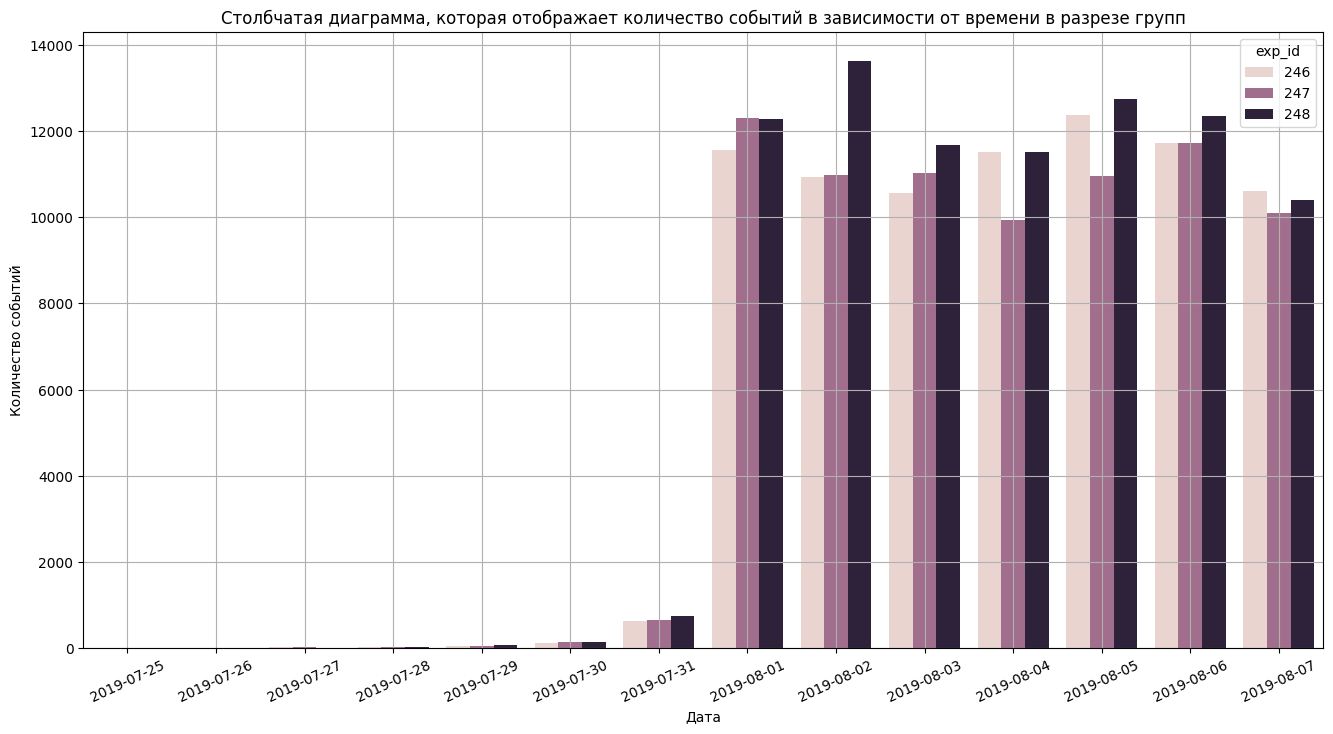

In [32]:
plt.figure(figsize=(16, 8))

sns.barplot(y=event_count['event_name'],
           x=event_count['event_dt'].dt.date,
           hue=event_count['exp_id']
           )

plt.title('Cтолбчатая диаграмма, которая отображает количество событий в зависимости от времени в разрезе групп')
plt.ylabel('Количество событий')
plt.xlabel('Дата')
plt.grid(True)
plt.xticks(rotation=25);

**Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?**

#### Вывод:
Исходя из анализа графика, можно сделать вывод, что данные за период с 25.07 по 31.07 практически отсутствуют, поэтому начало анализа данных следует проводить с 1.08.2019. Таким образом, доступны данные за неделю с 1 по 7 августа. Важно учитывать этот факт при дальнейшем исследовании.

### Много ли событий и пользователей вы потеряли, отбросив старые данные?

In [33]:
data

,event_name,user_id,event_timestamp,exp_id,event_date,event_dt
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [34]:
# сделаем срез данных, оставив только нужные данные
new_data = data[data['event_dt'] >=  '2019-08-01']

In [35]:
print('Отбросив старые данные мы потеряли:')
# посчитаем сколько пользователей мы потеряли срезав данные
lost_users = data['user_id'].nunique() - new_data['user_id'].nunique()
lost_users_per = round(lost_users / data['user_id'].nunique()* 100, 3)
print(f'Потерянных пользователей: {lost_users}({lost_users_per}%)')

# посчитаем сколько данных мы потеряди из за среза данных
lost_event = data.shape[0] - new_data.shape[0]
lost_event_per = round((1 - (new_data.shape[0] / data.shape[0])) * 100, 2)
print(f'Потерянных событий: {lost_event}({lost_event_per}%)')
print()

Отбросив старые данные мы потеряли:
Потерянных пользователей: 17(0.225%)
Потерянных событий: 2826(1.16%)



<a id='section3.7'></a>
### Проверим, что у вас есть пользователи из всех трёх экспериментальных групп.

In [36]:
# посчитаем пользователей каждой группы
group_size =(
    new_data.groupby('exp_id')
    .agg({'user_id' : 'nunique'})
    .reset_index()
    .rename(columns={'exp_id' : 'group_number',
        'user_id' : 'count_id'})
)
group_size

,group_number,count_id
0,246,2484
1,247,2513
2,248,2537


#### Вывод:
Исходя из сгруппированного графика, можно сделать вывод, что у нас есть пользователи из всех трех групп. Группа 246 содержит 2484 пользователя, группа 247 включает в себя 2513 пользователей, а группа 248 насчитывает 2537 пользователей. Таким образом, наблюдается распределение пользователей по группам, и каждая из них имеет свое уникальное количество пользователей.

<a id='section4'></a>
## Изучить воронку событий:

### Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

In [37]:
new_data['event_name'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

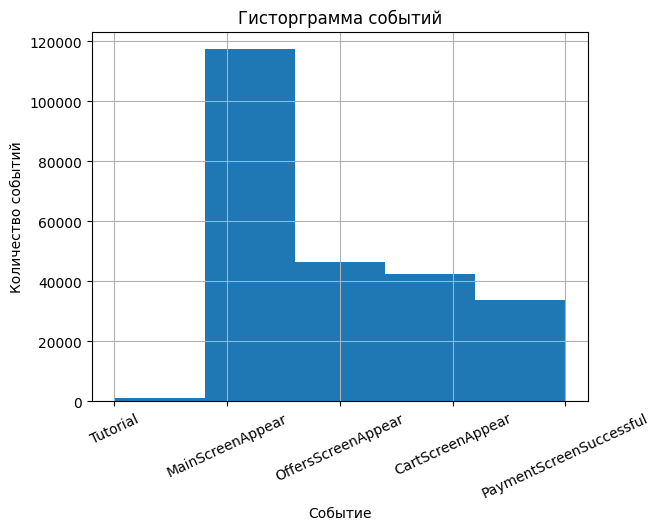

In [38]:
plt.hist(new_data['event_name'], bins=5)
plt.grid(True)
plt.title('Гисторграмма событий')
plt.ylabel('Количество событий')
plt.xlabel('Событие')
plt.xticks(rotation=25);

#### Вывод:
Чаще всего встречается MainScreenAppear(появился главный экран) - 117328 раз. Реже всего Tutorial(учебное пособие) - 1005 раз.

<a id='section4.2'></a>
### Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. - Посчитайте долю пользователей, которые хоть раз совершали событие.

In [39]:
new_data.head()

,event_name,user_id,event_timestamp,exp_id,event_date,event_dt
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01


In [40]:
# создадим функцию для находжения самого популярного события
def count_user_id(data):
    result = (
        data.groupby('event_name')
        .agg({'user_id': 'nunique'})
        .reset_index()
        .sort_values(by='user_id', ascending=False)
        .rename(columns={'user_id': 'count_user'})
    )
    
    total_users = data['user_id'].nunique()
    result['ratio, %'] = round(result['count_user'] / total_users, 2) * 100
    
    return result

In [41]:
count_user = count_user_id(new_data)

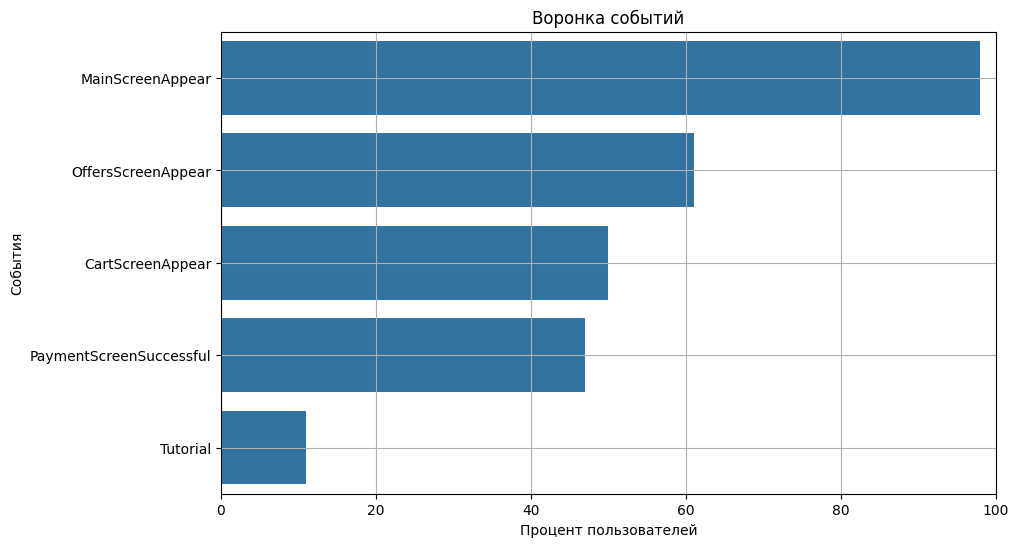

In [65]:
# строим график
plt.figure(figsize=(10, 6))
sns.barplot(x='ratio, %', 
            y='event_name', 
            data=count_user)

plt.title('Воронка событий')
plt.xlabel('Процент пользователей')
plt.ylabel('События')
plt.grid(True)
plt.xlim(0, 100)  
plt.show()

#### Вывод:
Из проведенного анализа данных можно сделать следующие выводы:

1. Событие MainScreenAppear (Появился главный экран) было совершено 7419 пользователями, что составляет примерно 98% от общего количества пользователей. Это говорит о том, что практически все пользователи заходят на главный экран приложения.

2. Событие OffersScreenAppear (Появление экрана с предложениями) было совершено 4593 пользователями, что составляет около 61% от общего количества пользователей. Это говорит о том, что менее половины пользователей, которые заходят на главный экран, заходят на экран с предложениями.

3. Событие CartScreenAppear (Появление экрана корзины) было совершено 3734 пользователями, что составляет около 50%. Это говорит о том, что половина пользователей заходят в раздел козина.

4. Событие PaymentScreenSuccessful	(Успешное выполнение платежа) было совершено 3539 пользователями, что составляет 47%. Это говорит о том, что 47% пользователей успешно совершают покупку.

5. Событие Tutorial (Учебное пособие) было совершено всего 840 пользователями, что составляет около 11% от общего количества пользователей. Это говорит о том, что только небольшая часть пользователей проходит обучение или использует учебные материалы в приложении.

Из проведенного анализа данных следует, что основной поток пользователей приложения проходит через главный экран, однако далее процент пользователей, переходящих на экран с предложениями и экран корзины, постепенно уменьшается. Только около половины пользователей, посетивших главный экран, завершают покупку. Кроме того, учебные материалы в приложении используются лишь небольшой частью пользователей.


### Предположим,  порядок событий. 

Могу предположить, что события проходят следкющим образом:
    1. Пользователь заходит на главный экран и выполняет событие MainScreenAppear.
    2. Далее пользователь переходит в экран с предложениями  - OffersScreenAppear
    3. Оттуда пользователи переходят в корзину, совершая событие CartScreenAppear
    4. С корзины пользователи уже совершают покупку, получается событие PaymentScreenSuccessful
    
Событие Tutorial не входит в последовательную цепочку - не будем учитывать их при подсчете воронки

### По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

In [45]:
# создадим срез данных без события Tutorial
count_user_cr = count_user[count_user['event_name'] != 'Tutorial'].copy()

In [46]:
# посчитаем долю пользователей которая переходит от шага к шагу
count_user_cr['conversion'] = (
    ((count_user_cr['count_user'] / count_user_cr['count_user'].shift(1)) * 100)
    .astype(float)
    .fillna(100)
    .apply(lambda x: f'{x:.2f}%')
)

In [47]:
count_user_cr

,event_name,count_user,"ratio, %",conversion
1,MainScreenAppear,7419,98.0,100.00%
2,OffersScreenAppear,4593,61.0,61.91%
0,CartScreenAppear,3734,50.0,81.30%
3,PaymentScreenSuccessful,3539,47.0,94.78%


#### Вывод: 
По полученным данным получается, что от первого события MainScreenAppear(Появился главный экран) ко воторому OffersScreenAppear(Появление экрана с предложениями) переходит 61.91% пользователей. От второго шага к третьему CartScreenAppear(Появление экрана корзины) переходит 81.3% пользователей. А от третьего шага к четвертому PaymentScreenSuccessful(Успешное выполнение платежа) переходит 94.78% пользоватлей.

### На каком шаге теряете больше всего пользователей?

Большой процент пользователей (38.09%) теряется именно на этом этапе — от MainScreenAppear до OffersScreenAppear. Это может быть связано с различными факторами, такими как неудовлетворительный дизайн экрана с предложениями, сложности в навигации или не подходящий контент для пользователей. Для уменьшения процента оттока пользователей на этом этапе можно провести дополнительное исследование. Например, можно организовать UX-исследование (Eye tracking или провести интервью) для выявления проблем с интерфейсом или понять, что их отпугивает на этом этапе.

### Какая доля пользователей доходит от первого события до оплаты?

In [48]:
fraction_users = (count_user_cr['count_user'][3] / count_user_cr['count_user'][1]) * 100
print(f"Доля пользователей, которые доходят от первого события до оплаты, равна {fraction_users:.2f}%")

Доля пользователей, которые доходят от первого события до оплаты, равна 47.70%


<a id='section5'></a>
## Изучим результаты эксперимента:

### Сколько пользователей в каждой экспериментальной группе?

Выше, я уже находил размер групп, в пункте [3.7](#section3.7). Продолжим работать с полученными данными.

In [49]:
group_size

,group_number,count_id
0,246,2484
1,247,2513
2,248,2537


#### Вывод:
Группы 246 и 247 - являются контрольными, количество участников в них равно 2484 и 2513 соответственно. Группа 248 - является эксперементальной и поличество пользователей в ней - 2537 пользователей.

### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

Критерии успешного A/A-теста: 

- Количество пользователей в 246 и 247 группе различается на 29 пользователей - это менее чем на 1%;

- Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;

- Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости;

- Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.

### Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

Соберем три группы в отдельные таблицы:

In [50]:
group_246 = new_data.query('(exp_id == 246) & (event_name != "Tutorial")')
group_247 = new_data.query('(exp_id == 247) & (event_name != "Tutorial")')
group_248 = new_data.query('(exp_id == 248) & (event_name != "Tutorial")')

In [51]:
group_246.head()

,event_name,user_id,event_timestamp,exp_id,event_date,event_dt
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2834,OffersScreenAppear,3737462046622621720,1564618226,246,2019-08-01 00:10:26,2019-08-01
2835,MainScreenAppear,3737462046622621720,1564618247,246,2019-08-01 00:10:47,2019-08-01


**Мы уже написали функцию для нахождения самого популярного события в пункте [4.2](#section4.2) , применим ее для остальных групп**

In [52]:
# выведем самые популярные события для всех пользователей
count_user

,event_name,count_user,"ratio, %"
1,MainScreenAppear,7419,98.0
2,OffersScreenAppear,4593,61.0
0,CartScreenAppear,3734,50.0
3,PaymentScreenSuccessful,3539,47.0
4,Tutorial,840,11.0


In [53]:
# выведем самые популярные события для пользователей группы 246
count_user_246 = count_user_id(group_246)
count_user_246

,event_name,count_user,"ratio, %"
1,MainScreenAppear,2450,99.0
2,OffersScreenAppear,1542,62.0
0,CartScreenAppear,1266,51.0
3,PaymentScreenSuccessful,1200,48.0


In [54]:
# выведем самые популярные события для пользователей группы 247
count_user_247 = count_user_id(group_247)
count_user_247

,event_name,count_user,"ratio, %"
1,MainScreenAppear,2476,99.0
2,OffersScreenAppear,1520,61.0
0,CartScreenAppear,1238,49.0
3,PaymentScreenSuccessful,1158,46.0


**События в группах распределенны в одинаковом порядке, проверим гипотезы о равенстве долей**

Сформулируем гипотезы. 

**Нулевая гипотеза:** Доли уникальных посетителей, посетивших этап воронки, равны.

**Альтернативная гипотеза:** Существует статистически значимая разница между долями уникальных посетителей, посетивших этап воронки.

Для проверки гипотез, используем метод проведения Z-теста, который применяется для проверки гипотезы о равенстве долей.

In [55]:
# составим список с уникальными событиями для работы цикла
events = new_data[new_data['event_name'] != 'Tutorial']['event_name'].unique()
print(events)

['MainScreenAppear' 'OffersScreenAppear' 'CartScreenAppear'
 'PaymentScreenSuccessful']


In [56]:
# функция для проверки гипотезы о равенстве долей
def z_test(one, two, alpha):
    #критический уровень статистической значимости
    alpha = alpha
    
    for i in events:
        
        #количсетво уникальных пользователей совершивших событие в каждой группе 
        event_users = (
            np.array([one[one['event_name'] == i]['user_id'].nunique(), 
                      two[two['event_name'] == i]['user_id'].nunique()])
        )

        #количество уникальных пользователей в группах
        users_group_all = np.array([one['user_id'].nunique(), two['user_id'].nunique()])

        # пропорция успехов в первой группе:
        p1 = event_users[0]/users_group_all[0]
        # пропорция успехов во второй группе:
        p2 = event_users[1]/users_group_all[1]

        # пропорция успехов в комбинированном датасете:
        p_combined = (event_users[0] + event_users[1]) / (users_group_all[0] + users_group_all[1])

        # разница пропорций в датасетах
        difference = p1 - p2

        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/users_group_all[0] + 1/users_group_all[1]))

        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1)  

        #Так как распределение статистики нормальное, вызовем метод cdf()
        #Саму статистику возьмём по модулю методом abs() — чтобы получить правильный результат независимо от её знака.
        #Это возможно, потому что тест двусторонний. По этой же причине удваиваем результат:
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print()
        print('Для события :', i)
        
        print('p-значение: ', p_value)

        if p_value < alpha:
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

In [57]:

    #критический уровень статистической значимости
    alpha = 0.05
    
    for i in events:
        
        #количсетво уникальных пользователей совершивших событие в каждой группе 
        event_users = (
            np.array([group_246[group_246['event_name'] == i]['user_id'].nunique(), 
                      group_247[group_247['event_name'] == i]['user_id'].nunique()])
        )
        #количество уникальных пользователей в группах
        users_group_all = np.array([group_246['user_id'].nunique(), group_247['user_id'].nunique()])
        # пропорция успехов в первой группе:
        p1 = event_users[0]/users_group_all[0]
        # пропорция успехов во второй группе:
        p2 = event_users[1]/users_group_all[1]
        # пропорция успехов в комбинированном датасете:
        p_combined = (event_users[0] + event_users[1]) / (users_group_all[0] + users_group_all[1])
        # разница пропорций в датасетах
        difference = p1 - p2
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/users_group_all[0] + 1/users_group_all[1]))
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1)  

        #Так как распределение статистики нормальное, вызовем метод cdf()
        #Саму статистику возьмём по модулю методом abs() — чтобы получить правильный результат независимо от её знака.
        #Это возможно, потому что тест двусторонний. По этой же причине удваиваем результат:
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print()
        print('Для события :', i)
        
        print('p-значение: ', p_value)

        if p_value < alpha:
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')


Для события : MainScreenAppear
p-значение:  0.7526703436483038
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : OffersScreenAppear
p-значение:  0.24786096925282264
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : CartScreenAppear
p-значение:  0.22867643757335676
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : PaymentScreenSuccessful
p-значение:  0.11446627829276612
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [58]:
# применим функцию для группы 246 и 247
z_test(group_246, group_247, 0.05)


Для события : MainScreenAppear
p-значение:  0.7526703436483038
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : OffersScreenAppear
p-значение:  0.24786096925282264
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : CartScreenAppear
p-значение:  0.22867643757335676
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : PaymentScreenSuccessful
p-значение:  0.11446627829276612
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Вывод: 
По результатам анализа данных, можно сделать вывод, что для ни одного из событий не была обнаружена статистически значимая разница между двумя группами. Таким образом, обе эти группы можно считать контрольными в рамках данного исследования.

### Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

In [59]:
# применим функцию для группы 246 и 248
z_test(group_246, group_248, 0.05)


Для события : MainScreenAppear
p-значение:  0.3387114076159288
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : OffersScreenAppear
p-значение:  0.21442476639710506
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : CartScreenAppear
p-значение:  0.08067367598823139
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : PaymentScreenSuccessful
p-значение:  0.21693033984516674
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [60]:
# применим функцию для группы 247 и 248
z_test(group_247, group_248, 0.05)


Для события : MainScreenAppear
p-значение:  0.5194964354051703
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : OffersScreenAppear
p-значение:  0.9333751305879443
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : CartScreenAppear
p-значение:  0.5878284605111943
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : PaymentScreenSuccessful
p-значение:  0.7275718682261119
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Выполним тест, для эксперементальной группы, с объединенной контрольной группой:

In [61]:
# Объеденим группу 246 и 247
group_unity = pd.concat([group_246, group_247])

In [62]:
if len(group_unity) == len(group_246) + len(group_247):
    print('Соединение прошло успешно')
else:
    print('Ошибка')

Соединение прошло успешно


In [63]:
# применим функцию для группы unity и 248
z_test(group_unity, group_248, 0.05)


Для события : MainScreenAppear
p-значение:  0.3486684291093256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : OffersScreenAppear
p-значение:  0.44582745409482394
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : CartScreenAppear
p-значение:  0.18683558686831558
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события : PaymentScreenSuccessful
p-значение:  0.6107918742187335
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Вывод:
При проведении теством между контрольной группой и эксперементальной группой, а так же между объединенной группой и эксперементальной не обнаруженна статистически значимая разница. Это гововорит о том, что изменения, внесенные экспериментом, не оказывают значительного влияния на группы.

### Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

При проведении проверки статистических гипотез выбор уровня значимости является важным шагом, определяющим надежность результатов и вероятность ошибок первого и второго рода. Уровень значимости 0.05 обычно считается стандартным выбором в статистическом анализе, так как он обеспечивает баланс между контролем вероятности ошибок первого и второго рода.

В вашем случае, если уровень значимости равен 0.1, это действительно довольно высокий уровень, который может привести к частым ложноположительным результатам. Для 16 проведенных тестов, включая различные комбинации контрольных и экспериментальных групп, использование метода Бонферрони может быть корректным подходом. Однако следует помнить, что при использовании этого метода уровень значимости становится значительно меньше, что снижает вероятность ложноположительных результатов, но может увеличить вероятность ложноотрицательных результатов (ошибок второго рода).



## Вывод:

В ходе выполнения анализа данных было проведено следующее:
1. Проведена предобработка данных, включающая загрузку, преобразование типов данных, переименование столбцов и удаление дубликатов.
2. Обнаружено отсутствие данных за период с 25.07 по 31.07, поэтому начало анализа проведено с 1.08.2019, доступны данные за неделю с 1 по 7 августа.
3. Изучена воронка событий, где выявлено, что основной поток пользователей приложения проходит через главный экран(98%), далее процент пользователей, переходящих на экран с предложениями составляет -61% и на экран корзины - 50%. Событие успешное выполнение платежа выполнинли 47% провентов пользоватлеей. Также обнаружено низкое использование учебных материалов в приложении.
4. Проанализированы шаги пользователей от одного события к другому в воронке, выявлены проценты переходов между этапами и потери пользователей на каждом этапе. От первого события MainScreenAppear(Появился главный экран) ко воторому OffersScreenAppear(Появление экрана с предложениями) переходит 61.91% пользователей. От второго шага к третьему CartScreenAppear(Появление экрана корзины) переходит 81.3% пользователей. А от третьего шага к четвертому PaymentScreenSuccessful(Успешное выполнение платежа) переходит 94.78% пользоватлей.
5. Раасчитан наибольший процент пользователей (38.09%) который теряется именно на этом этапе — от MainScreenAppear до OffersScreenAppear. Можно организовать UX-исследование (Eye tracking или провести интервью) для выявления проблем с интерфейсом или понять, что их отпугивает на этом этапе.
6. Изучены результаты эксперимента с тремя группами: двумя контрольными и одной экспериментальной. Размерности групп и количество участников в каждой группе определены.
7. Сформулированы гипотезы и проведено 16 статистических тестов с уровнем значимости 0.05. Не обнаружено статистической значимости, что изменения в шрифте повлияют на пользователей.

Этот анализ позволяет сделать вывод о том, что предлагаемые изменения в приложении, включая шрифт, не оказывают статистически значимого влияния на поведение пользователей.
